<h2> AutoML for Classification </h2>

In this notebook, we use Azure AutoML to select and test models on the classification task. AutoML is a very powerful tool that will automate most (if not all) of the model selection, validation, and testing processes. The process pipelines and models are predefined in AutoML, so we can just need to specify general parameters like data, task. The predefined models will be tried and the best one will be selected at the end.

We will reuse the breast cancer data in Module 6. AutoML will also take care of preprocessing data. Note that, the final data to upload to Azure should be converted to Pandas DataFrame if they are not.

<h3>Loading and Process Data</h3>

In [63]:
import pandas as pd
import numpy as np

#load the data as pandas dataset
bc = pd.read_csv('breast-cancer.csv')

#convert the target to string. In AutoML, the target for classification cannot be float/decimal
bc["Class"] = bc["Class"].astype(str)

#generate an array of index of the rows
indx = np.arange(bc.shape[0])

#shuffle the index
indx = np.random.permutation(indx)

#train, valid, and test index
#in this case, we take 100 rows for validation, and 100 rows for testing
#since the index is shuffled already, we can take last 100 as testing, and last 200 to 100 as validation
train_indx = indx[:-200]
valid_indx = indx[-200:-100]
test_indx = indx[-100:]

#we also remove ID from the data since it is not useful for classification
train_data = bc.loc[train_indx, 'ClumpThickness':]
valid_data = bc.loc[valid_indx, 'ClumpThickness':]
test_data = bc.loc[test_indx, 'ClumpThickness':]

In [64]:
train_data.head()

,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
362,3,2,2,1,4,3,2,1,1,0.0
212,1,1,1,1,2,1,3,1,1,0.0
679,2,1,1,1,2,1,1,1,1,0.0
396,3,1,1,1,2,1,3,1,1,0.0
45,1,1,1,1,2,1,2,1,2,0.0


In [26]:
valid_data.head()

,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
6,1,1,1,1,2,10,3,1,1,0.0
560,5,1,1,1,2,1,3,1,1,0.0
366,6,10,10,10,8,10,7,10,7,1.0
442,1,1,1,3,2,3,1,1,1,0.0
489,6,3,2,1,3,4,4,1,1,1.0


In [27]:
test_data.head()

,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
399,1,2,3,1,2,1,1,1,1,0.0
111,8,6,4,3,5,9,3,1,1,1.0
477,4,1,1,1,2,1,1,1,1,0.0
362,3,2,2,1,4,3,2,1,1,0.0
504,1,1,1,1,2,1,1,1,1,0.0


<h4>Upload to AzureML Environment</h4>

Make sure all the datasets to upload are pandas dataframes

In [67]:
from azureml.core import Workspace, Datastore, Dataset
import pandas as pd

ws = Workspace.from_config()
datastore = ws.get_default_datastore()
train_set_azure = Dataset.Tabular.register_pandas_dataframe(train_data, datastore, "dataset_from_pandas_df", show_progress=True)
valid_set_azure = Dataset.Tabular.register_pandas_dataframe(valid_data, datastore, "dataset_from_pandas_df", show_progress=True)
test_set_azure = Dataset.Tabular.register_pandas_dataframe(test_data, datastore, "dataset_from_pandas_df", show_progress=True)

2022-04-18:15:25:11,797 INFO     [workspace.py:290] Found the config file in: /config.json
2022-04-18:15:25:11,827 INFO     [_universal.py:475] Request URL: 'https://management.azure.com/subscriptions?api-version=REDACTED'/nRequest method: 'GET'/nRequest headers:/n    'Accept': 'application/json'/n    'x-ms-client-request-id': 'bd12076e-bf2b-11ec-8a70-99f98743290a'/n    'User-Agent': 'azsdk-python-azure-mgmt-resource/20.0.0 Python/3.6.9 (Linux-5.4.0-1068-azure-x86_64-with-debian-buster-sid)'/n    'Authorization': 'REDACTED'/nNo body was attached to the request
2022-04-18:15:25:11,884 INFO     [_universal.py:503] Response status: 200/nResponse headers:/n    'Cache-Control': 'no-cache'/n    'Pragma': 'no-cache'/n    'Content-Type': 'application/json; charset=utf-8'/n    'Content-Encoding': 'REDACTED'/n    'Expires': '-1'/n    'Vary': 'REDACTED'/n    'x-ms-ratelimit-remaining-tenant-reads': '11991'/n    'x-ms-request-id': '497a84f8-9b3d-4ec7-a13c-2baff9313644'/n    'x-ms-correlation-reque

Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/49bf4002-2ed3-4f8d-8589-5c3f0243fc61/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.
Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/a7632e99-149e-4a8a-b2ec-b8b78526031b/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.
Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/efe1f94d-146b-488a-9b64-b42fdf2bdbf1/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


<h3>Setting up and Run AutoML</h3>

The name of your compute\_target in the following cell can be obtained from the Azure Machine Learning Console, in the Compute section:

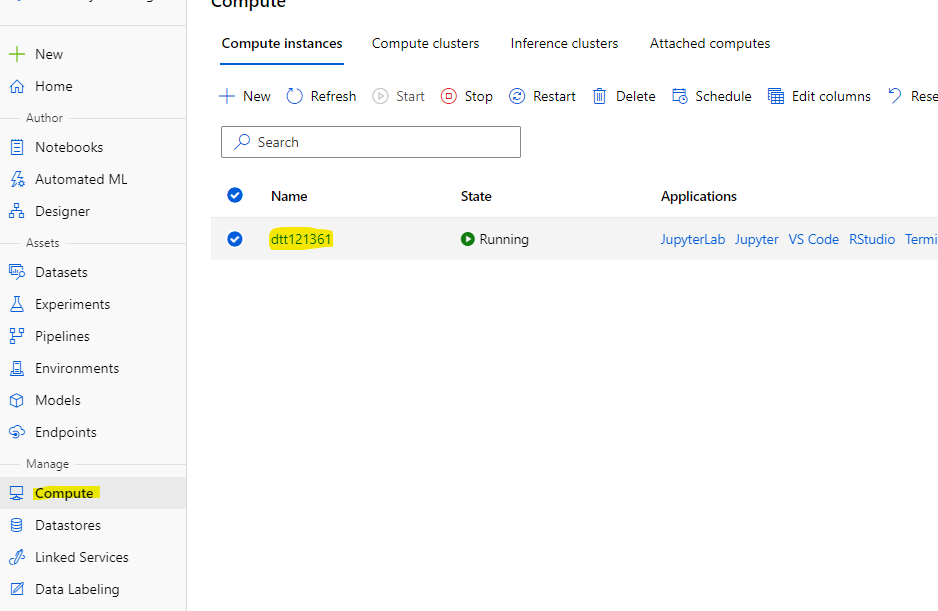

In [59]:
from azureml.core.compute import ComputeTarget

compute_target = ComputeTarget(workspace=ws, name='dtt121361') #the name= parameter is obtained from the Compute console

<h4>Configurations for AutoML</h4>

In [71]:
from azureml.train.automl import AutoMLConfig

automl_settings = {
    "verbosity": logging.INFO,  #this setting will enable automl logging while training
}

automl_config = AutoMLConfig(
    compute_target = compute_target, #the compute instance, we set this in the previous cell
    task = "classification", #the task -- we want to do classificatin
    primary_metric='accuracy', #the metric to select model
    training_data = train_set_azure, #training data
    validation_data = valid_set_azure, #validation data
    test_data = test_set_azure, #testing data
    label_column_name = 'Class', #name of the target column. In the breast cancer data, the column name is "Class"
    **automl_settings #incorporate settings from automl_settings
    )

In [72]:
from azureml.core.experiment import Experiment

# Choose a name for the experiment and specify the project folder.
experiment_name = 'automl-classification'
project_folder = './automl-classification'

experiment = Experiment(ws, experiment_name)

2022-04-18:15:27:25,721 INFO     [workspace.py:290] Found the config file in: /config.json
2022-04-18:15:27:25,748 INFO     [_universal.py:475] Request URL: 'https://management.azure.com/subscriptions?api-version=REDACTED'/nRequest method: 'GET'/nRequest headers:/n    'Accept': 'application/json'/n    'x-ms-client-request-id': '0ce53f2c-bf2c-11ec-8a70-99f98743290a'/n    'User-Agent': 'azsdk-python-azure-mgmt-resource/20.0.0 Python/3.6.9 (Linux-5.4.0-1068-azure-x86_64-with-debian-buster-sid)'/n    'Authorization': 'REDACTED'/nNo body was attached to the request
2022-04-18:15:27:26,239 INFO     [_universal.py:503] Response status: 200/nResponse headers:/n    'Cache-Control': 'no-cache'/n    'Pragma': 'no-cache'/n    'Content-Type': 'application/json; charset=utf-8'/n    'Content-Encoding': 'REDACTED'/n    'Expires': '-1'/n    'Vary': 'REDACTED'/n    'x-ms-ratelimit-remaining-tenant-reads': '11989'/n    'x-ms-request-id': '5074d7ef-d077-4b29-8e44-1f33e78ba7b8'/n    'x-ms-correlation-reque

Submit the experiment to run

In [73]:
run = experiment.submit(automl_config, show_output=True)

Submitting remote run.
No run_configuration provided, running on dtt121361 with default configuration
Running on remote compute: dtt121361


Experiment,Id,Type,Status,Details Page,Docs Page
automl-classification,AutoML_d540e4e2-49cc-44cc-a8fa-a2a5e3bce18d,automl,NotStarted,Link to Azure Machine Learning studio,Link to Documentation



Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: ModelSelection. Beginning model selection.

********************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and all classes are balanced in your training data.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData

********************************************************************************************

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values were detected in the training data.
              Learn more about missing value imputation: https://aka.ms/AutomatedMLFeaturization

***********************************************************************

<h4>Getting the Test Results and Predictions</h4>

The following code will generate all the evaluation metrics for the best model on the test data. For now, we can focus on the accuracy metric which is 97%. We will also obtain the prediction in a pandas dataframe predictions\_df

In [79]:
best_run, fitted_model = run.get_output()
test_run = next(best_run.get_children(type='automl.model_test'))
test_run.wait_for_completion(show_output=False, wait_post_processing=True)

# Get test metrics
test_run_metrics = test_run.get_metrics()
for name, value in test_run_metrics.items():
    print(f"{name}: {value}")

# Alternatively, the test predictions can be retrieved via the run outputs.
test_run.download_file("predictions/predictions.csv")
predictions_df = pd.read_csv("predictions.csv")

weighted_accuracy: 0.9648260211800302
log_loss: 0.15786727590983804
matthews_correlation: 0.9391393351333177
accuracy: 0.97
f1_score_micro: 0.97
recall_score_micro: 0.97
average_precision_score_micro: 0.9943009247679289
balanced_accuracy: 0.9758064516129032
f1_score_macro: 0.9686159640129721
AUC_macro: 0.9961799660441426
f1_score_weighted: 0.9701977194267184
AUC_micro: 0.9941
precision_score_binary: 0.926829268292683
f1_score_binary: 0.9620253164556963
norm_macro_recall: 0.9516129032258065
AUC_binary: 0.9961799660441427
AUC_weighted: 0.9961799660441426
average_precision_score_binary: 0.9934037679510834
precision_score_weighted: 0.9721951219512195
recall_score_weighted: 0.97
average_precision_score_macro: 0.9956501521485757
recall_score_macro: 0.9758064516129032
precision_score_micro: 0.97
average_precision_score_weighted: 0.9961892843559739
precision_score_macro: 0.9634146341463414
recall_score_binary: 1.0
accuracy_table: aml://artifactId/ExperimentRun/dcid.0336ee12-e82f-43bb-82b3-991c

In [78]:
predictions_df

,Class_orig,Class_predicted,0.0_predicted_proba,1.0_predicted_proba,ClumpThickness_orig,UniformityOfCellSize_orig,UniformityOfCellShape_orig,MarginalAdhesion_orig,SingleEpithelialCellSize_orig,BareNuclei_orig,BlandChromatin_orig,NormalNucleoli_orig,Mitoses_orig
0,1.00,1.00,0.04,0.96,9,9,10,3,6,10,7,10,6
1,1.00,1.00,0.03,0.97,8,10,10,10,5,10,8,10,6
2,0.00,0.00,0.98,0.02,3,1,1,1,2,1,1,1,1
3,1.00,1.00,0.07,0.93,10,10,8,6,4,5,8,10,1
4,0.00,1.00,0.46,0.54,5,2,2,4,2,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.66,0.34,5,2,4,1,1,1,1,1,1
96,1.00,1.00,0.18,0.82,3,3,5,2,3,10,7,1,1
97,0.00,0.00,0.99,0.01,1,1,1,1,2,1,2,1,1
98,0.00,0.00,0.89,0.11,5,1,1,1,1,1,3,1,1
